# Protest for Happiness Analysis 
    * Fereshteh Aghaei
    * Jen Mahon
    * Julia Squeri
    * John Shuford

In [1]:
# Magic Function for graphs/displays
%matplotlib inline

In [2]:
# Importing our Dependencies
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import numpy as np
import json
import time
import os
import requests
import pandas as pd
import scipy.stats as st
import gmaps
from scipy.stats import linregress
from scipy import stats
from config import g_key
from pprint import pprint


# Hide warning messages in notebook
import warnings
warnings.filterwarnings("ignore")

## Load & Read CSV files

In [3]:
Happiness_Data = pd.read_csv("Happiness_Data/clean_combined_happiness.csv")
Happiness_Data.head()

,Unnamed: 0,Country,Region,Total Happiness Score,Total Freedom Rate,2015 Happiness Rank,2015 Happiness Score,2015 Economy,2015 Family,2015 Health,...,2018 Generosity,2018 Dystopia Residual,2019 Happiness Rank,2019 Happiness Score,2019 Economy,2019 Family,2019 Health,2019 Freedom,2019 Generosity,2019 Dystopia Residual
0,0,Switzerland,Europe,37.557,3.103211,1.0,7.587,1.39651,1.34951,0.94143,...,0.256,0.357,6.0,7.480,1.452,1.526,1.052,0.572,0.263,0.343
1,1,Iceland,Europe,37.555,3.090173,2.0,7.561,1.30232,1.40223,0.94784,...,0.353,0.138,4.0,7.494,1.380,1.624,1.026,0.591,0.354,0.118
2,2,Denmark,Europe,37.730,3.129797,3.0,7.527,1.32548,1.36058,0.87464,...,0.284,0.408,2.0,7.600,1.383,1.573,0.996,0.592,0.252,0.410
3,3,Norway,Europe,37.705,3.190243,4.0,7.522,1.45900,1.33095,0.88521,...,0.286,0.340,3.0,7.554,1.488,1.582,1.028,0.603,0.271,0.341
4,4,Canada,North America,36.753,3.054771,5.0,7.427,1.32629,1.32261,0.90563,...,0.321,0.291,9.0,7.278,1.365,1.505,1.039,0.584,0.285,0.308


In [4]:
Protest_Data = pd.read_csv("Mass_Movement_Data/movement_data.csv")
Protest_Data.head()

,country,year,start,end,protest_duration,region,location,participants_category,protesterdemand1,stateresponse1,total protests
0,Colombia,2016,2016-10-05,2016-10-17,12 days,South America,"Plaza de Bol var & Casa de Nari o, Bogot",>10000,"political behavior, process",ignore,6
1,Colombia,2017,2017-01-22,2017-01-22,0 days,South America,Bogot,100-999,"political behavior, process",crowd dispersal,6
2,Colombia,2017,2017-04-01,2017-04-15,14 days,South America,Bogota,1000-1999,"political behavior, process",ignore,6
3,Colombia,2017,2017-10-05,2017-10-05,0 days,South America,Tumaco,50-99,land farm issue,crowd dispersal,6
4,Colombia,2018,2018-01-26,2018-01-26,0 days,South America,Bogota,2000-4999,social restrictions,crowd dispersal,6


### Count of protests
* How many total protests occurred per region? How does this differ between the regions?
        Bar chart of #
        ANOVA to find differences between 3 group means
        Can show in boxplot
* Heat map to show protests across regions and what countries have the most


## Region Count of Protests (2015-2019)

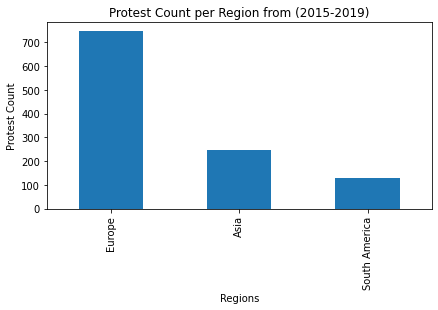

In [5]:
#Get count of how many protests per region
regions = Protest_Data['region'].value_counts()

regions.plot(kind='bar')
plt.tight_layout()
plt.xlabel("Regions")
plt.ylabel("Protest Count")
plt.title("Protest Count per Region from (2015-2019)")


# Save an image of our chart 
plt.savefig("Images/region_protest_plot.png")

plt.show()

# Europe Protests

In [6]:
europe = Protest_Data.loc[Protest_Data['region']== 'Europe']
europe_count = europe['country'].value_counts()
europe_count

Germany            117
France             110
United Kingdom      80
Romania             52
Spain               47
Greece              34
Ireland             34
Russia              32
Italy               26
Armenia             22
Poland              22
Moldova             21
Slovak Republic     14
Hungary             14
Albania             13
Macedonia           12
Bosnia              11
Belgium             10
Belarus              9
Czech Republic       8
Serbia               7
Georgia              7
Croatia              7
Kosovo               6
Latvia               6
Sweden               6
Finland              5
Bulgaria             5
Portugal             5
Cyprus               5
Name: country, dtype: int64

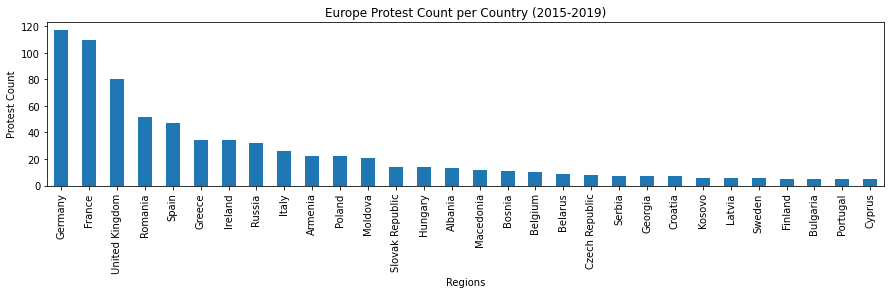

In [7]:
europe_count.plot(kind='bar', figsize=(15,3))
plt.title("Europe Protest Count per Country (2015-2019)")
plt.xlabel("Regions")
plt.ylabel("Protest Count")

# Save an image of our chart 
plt.savefig("Images/europe_protest_plot.png")

plt.show()

# Asia Protests

In [8]:
asia = Protest_Data.loc[Protest_Data['region']== 'Asia']
asia_count = asia['country'].value_counts()
asia_count

China          41
India          33
Malaysia       27
Pakistan       21
Bangladesh     19
Thailand       17
Indonesia      16
Afghanistan    15
Taiwan         12
Myanmar        12
South Korea    11
Philippines    11
Cambodia        6
Nepal           6
Name: country, dtype: int64

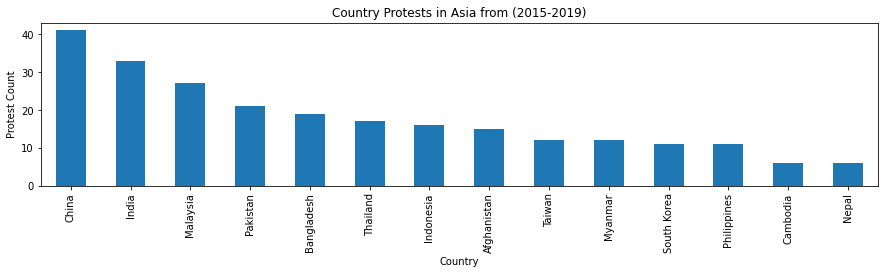

In [9]:
asia_count.plot(kind='bar', figsize=(15,3))
plt.xlabel("Country")
plt.ylabel("Protest Count")
plt.title("Country Protests in Asia from (2015-2019)")

# Save an image of our chart
plt.savefig("Images/asia_protest_plot.png")

plt.show()


# South America Protests

In [10]:
southamerica = Protest_Data.loc[Protest_Data['region']== 'South America']
southamerica_count = southamerica['country'].value_counts()
southamerica_count

Brazil       37
Venezuela    34
Chile        16
Argentina    14
Peru         11
Bolivia       9
Colombia      6
Name: country, dtype: int64

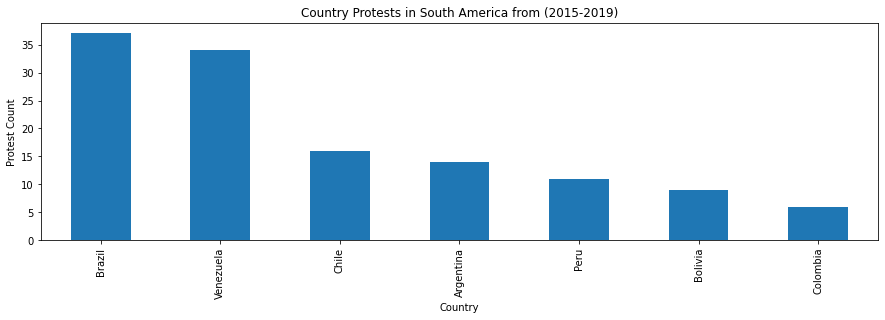

In [11]:
southamerica_count.plot(kind='bar', figsize=(15,4))
plt.xlabel("Country")
plt.ylabel("Protest Count")
plt.title("Country Protests in South America from (2015-2019)")

# Save an image of our chart
plt.savefig("Images/southamerica_protest_plot.png")

plt.show()


# Region Size of protest
* How many people attended the protests per region/what was the average protest size?
        * Bar chart of #
        * ANOVA to find differences between 3 group means
                * Can show in boxplot


In [12]:
# #Creates bins for protest size
# bins = [0,1,2,3,4,5]

# group_names = ["50-99", "100-999", "1000-1999","2000-4999","5000-10000", ">10000"]

In [13]:
south_america_count = Protest_Data.loc[Protest_Data['region'] == 'South America', 'participants_category'].value_counts()
europe_count = Protest_Data.loc[Protest_Data['region'] == 'Europe', 'participants_category'].value_counts()
asia_count = Protest_Data.loc[Protest_Data['region'] == 'Asia', 'participants_category'].value_counts()

In [14]:
protest_size_df = pd.DataFrame({"South America": south_america_count,
                               "Europe": europe_count,
                               "Asia": asia_count})
protest_size_df

,South America,Europe,Asia
100-999,32,153,91
1000-1999,4,28,10
2000-4999,24,157,48
50-99,23,193,51
5000-10000,12,71,16
>10000,32,145,31


In [15]:
protest_size_df = protest_size_df.reset_index()

# Reset index smallest to largest
protest_size_df2 = protest_size_df.reindex([3,0,1,2,4,5])
protest_df3 = protest_size_df2.set_index('index')
protest_df3

,South America,Europe,Asia
index,,,
50-99,23,193,51
100-999,32,153,91
1000-1999,4,28,10
2000-4999,24,157,48
5000-10000,12,71,16
>10000,32,145,31


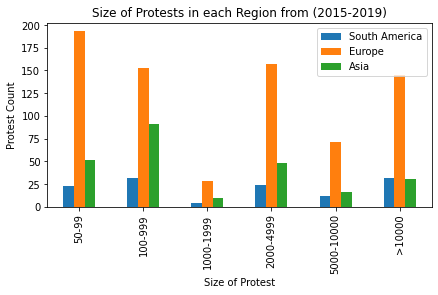

In [16]:


multi_plot = protest_df3.plot(kind="bar")
plt.tight_layout()
plt.xlabel("Size of Protest")
plt.ylabel("Protest Count")
plt.title("Size of Protests in each Region from (2015-2019)")

# Save an image of our chart 
plt.savefig("Images/regions_multi_plot.png")

plt.show()

# Region Protest Type
* What was the reason for the protest? (I.e, political behavior, police brutality, political process, etc) How does this differ between the regions?
        * Bar chart of #
        * ANOVA to find differences between 3 group means
                * Can show in boxplot
                * Can expand on these analyses to look at the protest breakdown per region (i.e, protests in europe)


In [17]:
### Setting / filtering values for each region's protest type
south_america_reason = Protest_Data.loc[Protest_Data['region'] == 'South America', 'protesterdemand1'].value_counts()
europe_reason = Protest_Data.loc[Protest_Data['region'] == 'Europe', 'protesterdemand1'].value_counts()
asia_reason = Protest_Data.loc[Protest_Data['region'] == 'Asia', 'protesterdemand1'].value_counts()

## South America Protest Reasons

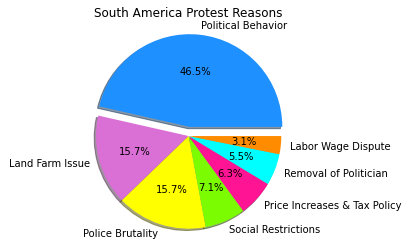

In [18]:
protest_reasons = ["Political Behavior", 
                   "Land Farm Issue", 
                   "Police Brutality", 
                   "Social Restrictions", 
                   "Price Increases & Tax Policy", 
                   "Removal of Politician", 
                   "Labor Wage Dispute"]

colors = ["dodgerblue","orchid","yellow","lawngreen","deeppink","cyan","darkorange"]

explode = (0.1,0,0,0,0,0,0)

south_america_reason.plot(kind='pie', 
               labels= protest_reasons, 
               colors=colors, 
               autopct="%1.1f%%", 
               ylabel= " ", 
               explode=explode, 
               shadow=True)


plt.title("South America Protest Reasons")

# Create axes which are equal so we have a perfect circle
plt.axis("equal")

# Save an image of our chart and print the final product to the screen
plt.savefig("Images/south_america_pie.png")
plt.show()


## Europe Protest Reasons


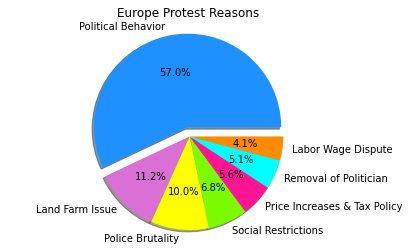

In [19]:
protest_reasons = ["Political Behavior", 
                   "Land Farm Issue", 
                   "Police Brutality", 
                   "Social Restrictions", 
                   "Price Increases & Tax Policy", 
                   "Removal of Politician", 
                   "Labor Wage Dispute"]

colors = ["dodgerblue","orchid","yellow","lawngreen","deeppink","cyan","darkorange"]

explode = (0.1,0,0,0,0,0,0)

europe_reason.plot(kind='pie', 
               labels= protest_reasons, 
               colors=colors, 
               autopct="%1.1f%%", 
               ylabel= " ", 
               explode=explode, 
               shadow=True)


plt.title("Europe Protest Reasons")

# Create axes which are equal so we have a perfect circle
plt.axis("equal")

# Save an image of our chart and print the final product to the screen
plt.savefig("Images/europe_pie.png")

plt.show()


## Asia Protest Reasons

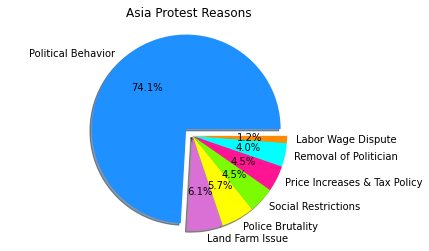

In [20]:
protest_reasons = ["Political Behavior", 
                   "Land Farm Issue", 
                   "Police Brutality", 
                   "Social Restrictions", 
                   "Price Increases & Tax Policy", 
                   "Removal of Politician", 
                   "Labor Wage Dispute"]

colors = ["dodgerblue","orchid","yellow","lawngreen","deeppink","cyan","darkorange"]

explode = (0.1,0,0,0,0,0,0)

asia_reason.plot(kind='pie', 
               labels= protest_reasons, 
               colors=colors, 
               autopct="%1.1f%%", 
               ylabel= " ", 
               explode=explode, 
               shadow=True)

plt.title("Asia Protest Reasons")

# Create axes which are equal so we have a perfect circle
plt.axis("equal")

# Save an image of our chart and print the final product to the screen
plt.savefig("Images/asia_pie.png")

plt.show()


----
# Happiness Scores (2015-2019)
* From World Happiness Report
        * Bar chart or box plot to show difference of happiness score between regions being compared
* Do the number/frequency of protests in a country affect how happy the country is?
        * Line chart happiness rating/protest numbers over the years
        * Scatter plot


In [21]:
#renaming column headers for easier merge
Happiness_Data = Happiness_Data.rename(columns={"Country":"country"})
Happiness_Data = Happiness_Data.rename(columns={"Region":"region"})
Happiness_Data.head()

,Unnamed: 0,country,region,Total Happiness Score,Total Freedom Rate,2015 Happiness Rank,2015 Happiness Score,2015 Economy,2015 Family,2015 Health,...,2018 Generosity,2018 Dystopia Residual,2019 Happiness Rank,2019 Happiness Score,2019 Economy,2019 Family,2019 Health,2019 Freedom,2019 Generosity,2019 Dystopia Residual
0,0,Switzerland,Europe,37.557,3.103211,1.0,7.587,1.39651,1.34951,0.94143,...,0.256,0.357,6.0,7.480,1.452,1.526,1.052,0.572,0.263,0.343
1,1,Iceland,Europe,37.555,3.090173,2.0,7.561,1.30232,1.40223,0.94784,...,0.353,0.138,4.0,7.494,1.380,1.624,1.026,0.591,0.354,0.118
2,2,Denmark,Europe,37.730,3.129797,3.0,7.527,1.32548,1.36058,0.87464,...,0.284,0.408,2.0,7.600,1.383,1.573,0.996,0.592,0.252,0.410
3,3,Norway,Europe,37.705,3.190243,4.0,7.522,1.45900,1.33095,0.88521,...,0.286,0.340,3.0,7.554,1.488,1.582,1.028,0.603,0.271,0.341
4,4,Canada,North America,36.753,3.054771,5.0,7.427,1.32629,1.32261,0.90563,...,0.321,0.291,9.0,7.278,1.365,1.505,1.039,0.584,0.285,0.308


## Region Country Count (2015-2019)

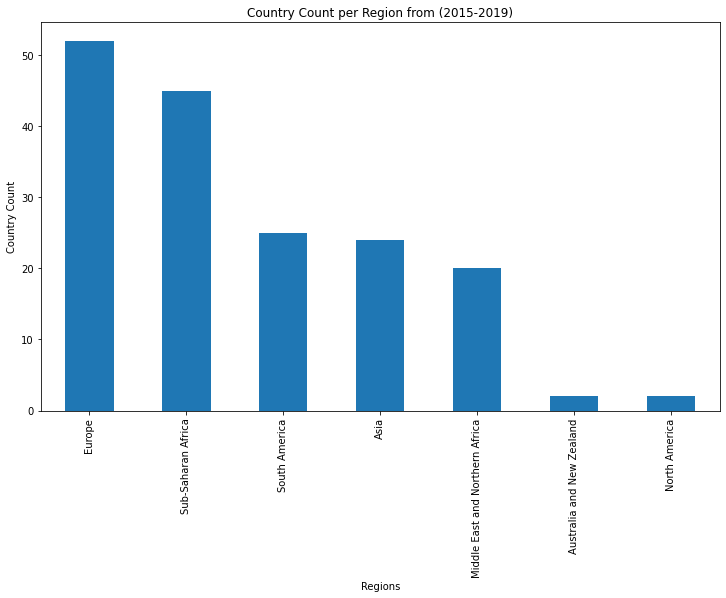

In [22]:
Happiness_Data.dropna(axis=0, how='any', inplace=True)

regions = Happiness_Data['region'].value_counts()

regions.plot(kind='bar',figsize=(10,8))
plt.tight_layout()
plt.xlabel("Regions")
plt.ylabel("Country Count")
plt.title("Country Count per Region from (2015-2019)")

# Save an image of our chart 
plt.savefig("Images/regions_happiness_plot.png")

plt.show()

## Region Freedom Score (2015-2019)

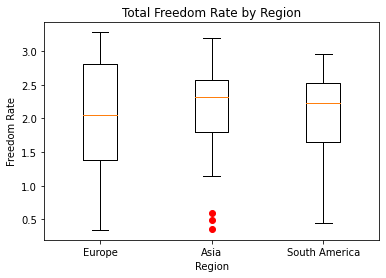

F_onewayResult(statistic=0.06739187733750217, pvalue=0.9348720759082814)

In [23]:
# creating a list for region of interest for 'for loop' (and later for plot labels)
region = ['Europe', 'Asia', 'South America']

# Create empty list for region freedom scores to fill with region data (for plotting)
region_freedom = []

# loopig through each country/region and grabbing total freedom score
for country in region:
    freedom = (Happiness_Data.loc[Happiness_Data['region'] == country, 'Total Freedom Rate'])
    region_freedom.append(freedom)

# Generate a box plot of Total Freedom Score for each region across three region of interest
fig1, ax1 = plt.subplots()
ax1.set_title ("Total Freedom Rate by Region")
ax1.set_xlabel("Region")
ax1.set_ylabel("Freedom Rate")
ax1.boxplot(region_freedom, notch = 0, sym = 'ro')
plt.xticks([1,2,3], region)

#save plot
plt.savefig("Images/region_freedom_boxplot.png")

plt.show()

# grouping each region for stats and pvalue
group1= region_freedom[0]
group2= region_freedom[1]
group3= region_freedom[2]
stats.f_oneway(group1, group2, group3)




## Region Happiness Score (2015-2019)

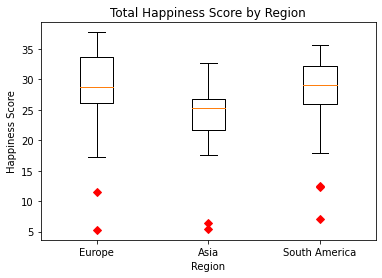

F_onewayResult(statistic=4.853789132519095, pvalue=0.00977261774156886)

In [24]:
# creating a list for region of interest for 'for loop' (and later for plot labels)
region = ['Europe', 'Asia', 'South America']

# Create empty list for region happiness scores to fill with region data (for plotting)
region_happiness = []

# loopig through each country/region and grabbing total happiness score
for country in region:
    happiness = (Happiness_Data.loc[Happiness_Data['region'] == country, 'Total Happiness Score'])
    region_happiness.append(happiness)

# Generate a box plot of Total Happiness Score for each region across three region of interest
fig1, ax1 = plt.subplots()
ax1.set_title ("Total Happiness Score by Region")
ax1.set_xlabel("Region")
ax1.set_ylabel("Happiness Score")
ax1.boxplot(region_happiness, notch = 0, sym = 'rD')
plt.xticks([1,2,3], region)

#save plot
plt.savefig("Images/region_happiness_boxplot.png")

plt.show()

# grouping each region for stats and pvalue
group1= region_happiness[0]
group2= region_happiness[1]
group3= region_happiness[2]
stats.f_oneway(group1, group2, group3)


## Reshape Happiness Dataframe

In [25]:
melt_happiness = pd.melt(Happiness_Data,
                 id_vars=['country',
                          'region',
                          'Total Happiness Score',
                          'Total Freedom Rate'],
                  value_vars=['2015 Happiness Rank',
                              '2015 Happiness Score',
                              '2015 Freedom',
                                                            
                              '2016 Happiness Rank',
                              '2016 Happiness Score',
                              '2016 Freedom',
                                                       
                              '2017 Happiness Rank',
                              '2017 Happiness Score',
                              '2017 Freedom',
                                                     
                              '2018 Happiness Rank',
                              '2018 Happiness Score',
                              '2018 Freedom',
                          
                              '2019 Happiness Rank',
                              '2019 Happiness Score',
                              '2019 Freedom'],
                  var_name='Years')

# Renaming Column headers 
melt_happiness = melt_happiness.rename(columns={"value":"Happiness Rank"})

melt_happiness = melt_happiness.rename(columns={"Total Happiness Score":"Sum Happiness Score (2015-2019)"})

melt_happiness = melt_happiness.rename(columns={"Total Freedom Rate":"Sum Freedom Score (2015-2019)"})

# Switching column spots for better organization
col_name="Happiness Rank"
sec_col = melt_happiness.pop(col_name)
melt_happiness.insert(4, col_name, sec_col)

melt_happiness.head()

,country,region,Sum Happiness Score (2015-2019),Sum Freedom Score (2015-2019),Happiness Rank,Years
0,Switzerland,Europe,37.557,3.103211,1.0,2015 Happiness Rank
1,Iceland,Europe,37.555,3.090173,2.0,2015 Happiness Rank
2,Denmark,Europe,37.730,3.129797,3.0,2015 Happiness Rank
3,Norway,Europe,37.705,3.190243,4.0,2015 Happiness Rank
4,Canada,North America,36.753,3.054771,5.0,2015 Happiness Rank


### Happiness Data Stats (2015-2019)

In [26]:
happiness_stats = melt_happiness.describe()
happiness_stats

,Sum Happiness Score (2015-2019),Sum Freedom Score (2015-2019),Happiness Rank
count,2550.000000,2550.000000,2550.000000
mean,24.743482,1.891018,25.909751
std,7.725198,0.799859,43.165868
min,4.369000,0.109730,0.000000
25%,20.241000,1.277942,0.451925
50%,25.791000,2.038566,4.809000
75%,30.112000,2.492338,29.000000
max,37.730000,3.279939,158.000000


In [27]:
print ('Sum Happiness Score (2015-2019)(max):',melt_happiness['Sum Happiness Score (2015-2019)'].max())
print ('Sum Happiness Score (2015-2019)(min):',melt_happiness['Sum Happiness Score (2015-2019)'].min())
print ('Sum Happiness Score (2015-2019)(mean):',melt_happiness['Sum Happiness Score (2015-2019)'].mean())

Sum Happiness Score (2015-2019)(max): 37.72999983596802
Sum Happiness Score (2015-2019)(min): 4.369
Sum Happiness Score (2015-2019)(mean): 24.743482353793876


## Top 5 Happiest / Freest  Countries (2015-2019)

In [28]:
# Create a new dataframe for those countries where "Total Happiness Score" is greater than 36.75
# have at least Total Freedom Rate of 3.05
top5 = melt_happiness.loc[(melt_happiness['Sum Happiness Score (2015-2019)'] >= 36.75) &
                                                 (melt_happiness['Sum Freedom Score (2015-2019)'] >3.05)]
                                              

top5.head(5)

,country,region,Sum Happiness Score (2015-2019),Sum Freedom Score (2015-2019),Happiness Rank,Years
0,Switzerland,Europe,37.557,3.103211,1.0,2015 Happiness Rank
1,Iceland,Europe,37.555,3.090173,2.0,2015 Happiness Rank
2,Denmark,Europe,37.730,3.129797,3.0,2015 Happiness Rank
3,Norway,Europe,37.705,3.190243,4.0,2015 Happiness Rank
4,Canada,North America,36.753,3.054771,5.0,2015 Happiness Rank


## Bottom 5 Happiest / Freest  Countries (2015-2019)

In [29]:
# Create a new dataframe for those countries where "Total Happiness Score" is less or equal 12
# have the highest Total Freedom Rate of .5
bottom5 = melt_happiness.loc[(melt_happiness['Sum Happiness Score (2015-2019)'] <= 12) &
                                                 (melt_happiness['Sum Freedom Score (2015-2019)'] < .5)]
                                              

bottom5.head()

,country,region,Sum Happiness Score (2015-2019),Sum Freedom Score (2015-2019),Happiness Rank,Years
90,Somaliland region,Sub-Saharan Africa,5.057,0.465820,91.0,2015 Happiness Rank
125,Djibouti,Sub-Saharan Africa,4.369,0.460740,126.0,2015 Happiness Rank
158,Puerto Rico,South America,7.039,0.468230,0.0,2015 Happiness Rank
161,Somaliland Region,Sub-Saharan Africa,5.057,0.391300,0.0,2015 Happiness Rank
164,Taiwan Province of China,Asia,6.422,0.361467,0.0,2015 Happiness Rank


### Number of Countries in each Region

In [30]:
melt_happiness['region'].value_counts()

Europe                             780
Sub-Saharan Africa                 675
South America                      375
Asia                               360
Middle East and Northern Africa    300
North America                       30
Australia and New Zealand           30
Name: region, dtype: int64

### Region Average Happiness Score (2015-2019)

In [31]:
melt_happiness.groupby('region').mean()['Sum Happiness Score (2015-2019)'].sort_values(ascending=False)

region
Australia and New Zealand          36.473000
North America                      35.873500
Europe                             28.746038
South America                      26.745720
Middle East and Northern Africa    25.618600
Asia                               23.525833
Sub-Saharan Africa                 18.250444
Name: Sum Happiness Score (2015-2019), dtype: float64

### Germany Happiness Data (2015-2019)

* Looking at Germnay's Happiness Rank since Germany had the highest number of protests

In [32]:
germany_happiness = melt_happiness.loc[melt_happiness['country']=='Germany']

germany_protest = Protest_Data.loc[Protest_Data['country']=='Germany']

germany_happiness= germany_happiness.rename(columns={"Happiness Rank":"Metrics"})

# Switching column spots for better organization
col_name = "Years"
sec_col = germany_happiness.pop(col_name)
germany_happiness.insert(2, col_name, sec_col)

col_name = "Metrics"
sec_col = germany_happiness.pop(col_name)
germany_happiness.insert(3, col_name, sec_col)

germany_happiness

,country,region,Years,Metrics,Sum Happiness Score (2015-2019),Sum Freedom Score (2015-2019)
25,Germany,Europe,2015 Happiness Rank,26.000000,34.645,2.792941
195,Germany,Europe,2015 Happiness Score,6.750000,34.645,2.792941
365,Germany,Europe,2015 Freedom,0.614770,34.645,2.792941
535,Germany,Europe,2016 Happiness Rank,16.000000,34.645,2.792941
705,Germany,Europe,2016 Happiness Score,6.994000,34.645,2.792941
875,Germany,Europe,2016 Freedom,0.534660,34.645,2.792941
1045,Germany,Europe,2017 Happiness Rank,16.000000,34.645,2.792941
1215,Germany,Europe,2017 Happiness Score,6.951000,34.645,2.792941
1385,Germany,Europe,2017 Freedom,0.562511,34.645,2.792941
1555,Germany,Europe,2018 Happiness Rank,15.000000,34.645,2.792941


## Groupby Protest Dataframe

In [33]:
grouped_protest = Protest_Data.groupby('country')['total protests'].count()
grouped_protest

country
Afghanistan         15
Albania             13
Argentina           14
Armenia             22
Bangladesh          19
Belarus              9
Belgium             10
Bolivia              9
Bosnia              11
Brazil              37
Bulgaria             5
Cambodia             6
Chile               16
China               41
Colombia             6
Croatia              7
Cyprus               5
Czech Republic       8
Finland              5
France             110
Georgia              7
Germany            117
Greece              34
Hungary             14
India               33
Indonesia           16
Ireland             34
Italy               26
Kosovo               6
Latvia               6
Macedonia           12
Malaysia            27
Moldova             21
Myanmar             12
Nepal                6
Pakistan            21
Peru                11
Philippines         11
Poland              22
Portugal             5
Romania             52
Russia              32
Serbia               7
Slo

### Groupby reshaped Happiness Data

In [34]:
grouped_happiness = melt_happiness.groupby('country')['Sum Happiness Score (2015-2019)','Sum Freedom Score (2015-2019)' ].mean()
grouped_happiness

,Sum Happiness Score (2015-2019),Sum Freedom Score (2015-2019)
country,,
Afghanistan,17.564,0.589620
Albania,23.563,1.859489
Algeria,28.338,0.892186
Angola,15.489,0.109730
Argentina,32.297,2.408099
...,...,...
Venezuela,27.657,1.068547
Vietnam,25.773,2.886036
Yemen,18.129,1.220874


### Merge grouby(Protest Data) with grouby(Happiness Data)

In [35]:
#Countries and happiness score
happiness_protest_df = pd.merge(grouped_protest, grouped_happiness, on=['country'], how='left')

happiness_protest_df = happiness_protest_df.fillna(0)

happiness_protest_df.head()

,total protests,Sum Happiness Score (2015-2019),Sum Freedom Score (2015-2019)
country,,,
Afghanistan,15,17.564,0.589620
Albania,13,23.563,1.859489
Argentina,14,32.297,2.408099
Armenia,22,21.966,1.080143
Bangladesh,19,22.901,2.391337


In [36]:
happiness_protest_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, Afghanistan to Venezuela
Data columns (total 3 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   total protests                   51 non-null     int64  
 1   Sum Happiness Score (2015-2019)  51 non-null     float64
 2   Sum Freedom Score (2015-2019)    51 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.6+ KB


### Freedom score/index 
* From World Happiness Report
* Does a country's freedom score correlate with the amount of protests occurring?
        * Scatter
        * Could do per region, or for one specific region/country 
            * For ex, if we see one country has a low freedom score and a low number of protests, could be more 
              meaningful to just show that countries data (does that mean the protests are suppressed? Does that mean 
              people feel like they cant protest?) 


## Country's Freedom Score vs Protests (2015-2019)

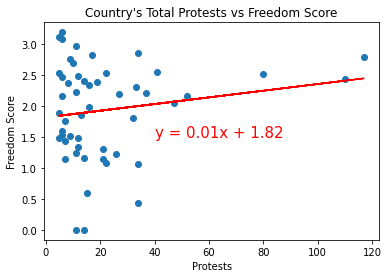

(0.16404285209054356, 0.25003264741441794)
The r-squared is: 0.02691005732199998


In [37]:
#plotting total protess and Freedom scores
x_values = happiness_protest_df['total protests']
y_values = happiness_protest_df['Sum Freedom Score (2015-2019)']
plt.scatter(x_values, y_values)
plt.title("Country's Total Protests vs Freedom Score")
plt.xlabel("Protests")
plt.ylabel("Freedom Score")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,1.5),fontsize=15,color="red")



# Save an image of our chart 
plt.savefig("Images/freedom_vs_protest_plot.png")

#Display graph
plt.show()

print(stats.pearsonr(x_values, y_values))
print(f"The r-squared is: {rvalue**2}")


### Perceptions of corruption/government trust
* From World Happiness Report
* Does a country's perception of corruption/trust of government  correlate with the amount of protests occurring? Does it correlate with the type of protests occurring? (i.e, does a country with low trust in its government have a greater number of anti-government protests?)
        * Scatter
        * Could do per region, or for one specific region/country 
            * For ex, if we see one country has a low trust number and a high number of protests, could be more meaningful 
               to just show that countries data (Do we see a relationship where low trust in government leads to a greater 
               number of anti-gov’t/anti-corruption protests?)


## Country's Happiness Score vs Protests (2015-2019)

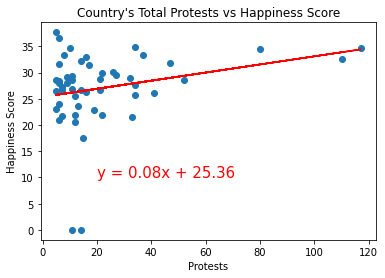

(0.2585561586511966, 0.06695538185886227)
The r-squared is: 0.0668512871764627


In [38]:
#plotting total protess and Happiness scores
x_values = happiness_protest_df['total protests']
y_values = happiness_protest_df['Sum Happiness Score (2015-2019)']
plt.scatter(x_values, y_values)

plt.title("Country's Total Protests vs Happiness Score")
plt.xlabel("Protests")
plt.ylabel("Happiness Score")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,10),fontsize=15,color="red")

# Save an image of our chart 
plt.savefig("Images/happiness_vs_protest_plot.png")

#Display graph
plt.show()

print(stats.pearsonr(x_values, y_values))
print(f"The r-squared is: {rvalue**2}")


## Create a Heat-Map to visualise Each Region (Country & Capital City) on Google Map

In [129]:
#                              ***HeatMap****

# A seperate Data was created for country/capitol
capitals = pd.read_csv('Additional_Resources/country-list.csv')
capitals_df = pd.DataFrame(capitals)
capitals_df = capitals_df.drop(labels = 'type', axis=1)
heatmap = pd.merge(happiness_protest_df, capitals_df, how="left", on = 'country')
heatmap = heatmap.dropna()
heatmap = heatmap.drop_duplicates(subset = 'country')
heatmap.columns

Index(['country', 'total protests', 'Sum Happiness Score (2015-2019)',
       'Sum Freedom Score (2015-2019)', 'capital'],
      dtype='object')

In [130]:
heatmap['Lat'] = ''
heatmap['Lng'] = ''

for index, row in heatmap.iterrows():
    try:
        target_city = f'{row[0]},{row[4]}'
        target_url = ('https://maps.googleapis.com/maps/api/geocode/json?address={0}&key={1}').format(target_city,g_key)
        geo_data = requests.get(target_url).json()
        #pprint(geo_data)
        heatmap.loc[index,'Lat'] = (geo_data["results"][0]["geometry"]["location"]["lat"])
        heatmap.loc[index,'Lng'] = (geo_data["results"][0]["geometry"]["location"]["lng"])
    except:
        print('The Capital does not exist!')

In [131]:
#configuring the gmap
gmaps.configure(api_key=g_key)
#store lat and lng as floats
locations = heatmap[["Lat", "Lng"]].astype(float)

happiness_score = heatmap['Sum Happiness Score (2015-2019)'].astype(float)
happiness_score
#creating the heatmap
fig = gmaps.figure()
heat_layer = gmaps.heatmap_layer(locations, weights=happiness_score,
                                 dissipating=False, max_intensity=100,
                                 point_radius = 1)
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))

### To run the code:
* Install citypy in your python environment (https://pypi.python.org/pypi/citipy)
* Google API Key (https://console.developers.google.com/getting-started) as 'g_key'
* Create API Keys and store it in the 'api_keys.py' file before running the Jupyter notebooks.